# League of Legends Diamond Ranked Games (10 min)

## (1) introduction
"League of Legends" is a team-based strategy game. Two teams with five powerful summoners will face each other in a canyon. The goal of the team is to tear down each other's base.

A typical League of Legends game usually lasts 30 to 45 minutes, and each game can be divided into three stages: the laning stage, the mid-term and late-stage. Players usually spend the first 10 to 15 minutes in their own branch (up, middle, down, JG) to develop in order to gain the advantage of equipment and level as early as possible.

The combination of heroes of each team will have a crucial impact on the outcome of the game, because some heroes are very strong in the early game, while other heroes will grow substantially in the middle and late game.
In the high score game of LOL (diamond to master segment), the final direction of the game is analyzed based on the data of the first 10 minutes. 

### dataset 

https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min

## (2) method

Based on neural network, we use the model to train the dataset and predict the result, win or lose.

The neural network structure is that:

input size = 9

16 units dense layer

32 units full connect layer

16 units dense layer

8 units dense layer

the binary output layer



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./data/lol/high_diamond_ranked_10min.csv')

cols = ['gameId', 'blueWardsPlaced', 'blueWardsDestroyed',
        'blueDeaths', 
       'blueEliteMonsters', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
        'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redDeaths',
       'redEliteMonsters', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redGoldPerMin']
df = df.drop(cols, axis=1)
y = df['blueWins']

In [ ]:
clist = df[df.columns[1:]].apply(lambda x: x.corr(df['blueWins']))
cols=[]
for col in clist.index:
    if (clist[col]>0.2 or clist[col]<-0.2):
        cols.append(col)
df = df[cols]
print(df)

      blueFirstBlood  blueKills  ...  redDragons  redCSPerMin
0                  1          9  ...           0         19.7
1                  0          5  ...           1         24.0
2                  0          7  ...           0         20.3
3                  0          4  ...           0         23.5
4                  0          6  ...           1         22.5
...              ...        ...  ...         ...          ...
9874               1          7  ...           0         22.9
9875               0          6  ...           0         20.6
9876               0          6  ...           1         26.1
9877               1          2  ...           0         24.7
9878               1          6  ...           1         20.1

[9879 rows x 9 columns]


In [ ]:
scaler = MinMaxScaler()
scaler.fit(df)
X = scaler.transform(df)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
model = Sequential()
model.add(Dense(16, input_shape=(9,)))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(8))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='SGD',metrics=['accuracy'])
history = model.fit(X_train,y_train,validation_split=0.3, epochs=10)

Epoch 1/10
173/173 [==============================] - 1s 3ms/step - loss: 0.6510 - accuracy: 0.6379 - val_loss: 0.6368 - val_accuracy: 0.6377
Epoch 2/10
173/173 [==============================] - 0s 2ms/step - loss: 0.6322 - accuracy: 0.6440 - val_loss: 0.6216 - val_accuracy: 0.6508
Epoch 3/10
173/173 [==============================] - 0s 2ms/step - loss: 0.6147 - accuracy: 0.6601 - val_loss: 0.6079 - val_accuracy: 0.6740
Epoch 4/10
173/173 [==============================] - 0s 2ms/step - loss: 0.5973 - accuracy: 0.6831 - val_loss: 0.5938 - val_accuracy: 0.6887
Epoch 5/10
173/173 [==============================] - 0s 2ms/step - loss: 0.5811 - accuracy: 0.7001 - val_loss: 0.5807 - val_accuracy: 0.6951
Epoch 6/10
173/173 [==============================] - 0s 2ms/step - loss: 0.5689 - accuracy: 0.7086 - val_loss: 0.5703 - val_accuracy: 0.7014
Epoch 7/10
173/173 [==============================] - 0s 2ms/step - loss: 0.5644 - accuracy: 0.7166 - val_loss: 0.5695 - val_accuracy: 0.6980
Epoch 

## (3) results

accuracy

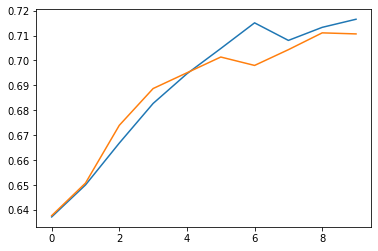

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

loss

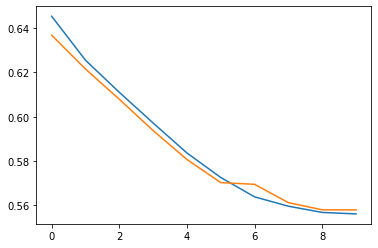

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## (4) discussion

The results are good at about 70% accuracy, but not good enough for the prediction. There are only 9 elements for the input, which is a very low-dimensional data set, because "League of Legends" may capture hundreds of variables from each game. For further experiments, functions such as hero combination, time range, and champion proficiency of a specific player can be included in the analysis. 